# Final Project: Movie Recommendation system

In [1051]:
# Importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

## Data acquisition

In [1052]:
# importing datasets
movies_df = pd.read_csv('./Dataset_original/movies.csv')
ratings_df = pd.read_csv('./Dataset_original/ratings.csv')

### Movies Dataset

***movieId*** – Unique movie ID per title.

***genres*** – The type of movie.

In [1053]:
# Displaying movies dataset
movies_df.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [1054]:
# Checking shape of dataset
movies_df.shape

(10329, 3)

In [1055]:
# Checking datatypes
print(movies_df.dtypes)

movieId     int64
title      object
genres     object
dtype: object


In [1056]:
# Describing dataset
movies_df.describe()

movieId
count   10329.000000
mean    31924.282893
std     37734.741149
min         1.000000
25%      3240.000000
50%      7088.000000
75%     59900.000000
max    149532.000000

### Ratings Dataset

**Ratings.csv**

***userId*** – Unique for each user.

***movieId*** – Unique movie ID per title.

***rating*** – Ratings given by each user for every watched film.

***Timestamp*** – Timestamp of rating.

In [1057]:
# Displaying dataset
ratings_df.head()

userId  movieId  rating   timestamp
0       1       16     4.0  1217897793
1       1       24     1.5  1217895807
2       1       32     4.0  1217896246
3       1       47     4.0  1217896556
4       1       50     4.0  1217896523

In [1058]:
# Checking shape of dataset
ratings_df.shape

(105339, 4)

In [1059]:
# Checking datatypes
print(ratings_df.dtypes)

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object


In [1060]:
# Describing dataset
ratings_df.describe()

userId        movieId         rating     timestamp
count  105339.000000  105339.000000  105339.000000  1.053390e+05
mean      364.924539   13381.312477       3.516850  1.130424e+09
std       197.486905   26170.456869       1.044872  1.802660e+08
min         1.000000       1.000000       0.500000  8.285650e+08
25%       192.000000    1073.000000       3.000000  9.711008e+08
50%       383.000000    2497.000000       3.500000  1.115154e+09
75%       557.000000    5991.000000       4.000000  1.275496e+09
max       668.000000  149532.000000       5.000000  1.452405e+09

In [1062]:
# Converting datetype
ratings_df["timestamp"]= pd.to_datetime(ratings_df.timestamp)
ratings_df.head()

userId  movieId  rating                     timestamp
0       1       16     4.0 1970-01-01 00:00:01.217897793
1       1       24     1.5 1970-01-01 00:00:01.217895807
2       1       32     4.0 1970-01-01 00:00:01.217896246
3       1       47     4.0 1970-01-01 00:00:01.217896556
4       1       50     4.0 1970-01-01 00:00:01.217896523

### Combined Dataset
**Merging Datasets based on movieId**

In [1063]:
# Merging datasets on movie_id
all_movies  = pd.merge(left=movies_df, right=ratings_df, how='left', on = 'movieId')
print('Total dataset: {}'.format(all_movies.shape[0]))
all_movies.head()

Total dataset: 105343


movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
2        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
3        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
4        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   

   userId  rating                     timestamp  
0     2.0     5.0 1970-01-01 00:00:00.859046895  
1     5.0     4.0 1970-01-01 00:00:01.303501039  
2     8.0     5.0 1970-01-01 00:00:00.858610933  
3    11.0     4.0 1970-01-01 00:00:00.850815810  
4    14.0     4.0 1970-01-01 00:00:00.851766286

In [1064]:
all_movies.shape

(105343, 6)

## Data wrangling / cleaning

In [1065]:
# Describing dataset
all_movies.describe()

movieId         userId         rating
count  105343.000000  105339.000000  105339.000000
mean    13382.696373     364.924539       3.516850
std     26172.698128     197.486905       1.044872
min         1.000000       1.000000       0.500000
25%      1073.000000     192.000000       3.000000
50%      2497.000000     383.000000       3.500000
75%      5991.000000     557.000000       4.000000
max    149532.000000     668.000000       5.000000

In [1066]:
# Checking NULL values per row
amount_of_null_values_per_row = all_movies.isnull().sum(axis=1)
pd.Series(amount_of_null_values_per_row).value_counts()

0    105339
3         4
dtype: int64

In [1067]:
# Checking NULL values per variable
missing = all_movies.isnull().sum().sort_values(ascending=False)
missing

timestamp    4
rating       4
userId       4
genres       0
title        0
movieId      0
dtype: int64

In [1068]:
# Checking NULL values per column in relation to all values of a column
def missing_values_table(df):
    mis_val = all_movies.isnull().sum()
    mis_val_percent = 100 * all_movies.isnull().sum()/len(all_movies)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : "Missing Values", 1 : "% of Total Values"})
    return mis_val_table_ren_columns
missing_values_table(all_movies)

Missing Values  % of Total Values
movieId                 0           0.000000
title                   0           0.000000
genres                  0           0.000000
userId                  4           0.003797
rating                  4           0.003797
timestamp               4           0.003797

In [1070]:
# Dropping NULL values
all_movies.dropna(inplace=True) 

In [1071]:
# Saving the cleaned data into .pkl
all_movies.to_csv(r'Dataset_cleaned\Dataset_cleaned.csv')

## Data exploration and analysis

In [977]:
# Displaying number of unique users and movies in dataset
print(f"Number of Unique Users: {all_movies['userId'].nunique()}")
print(f"Number of Movies: {all_movies['movieId'].nunique()}")

Number of Unique Users: 668
Number of Movies: 10325


**Top 10 most rated movies**

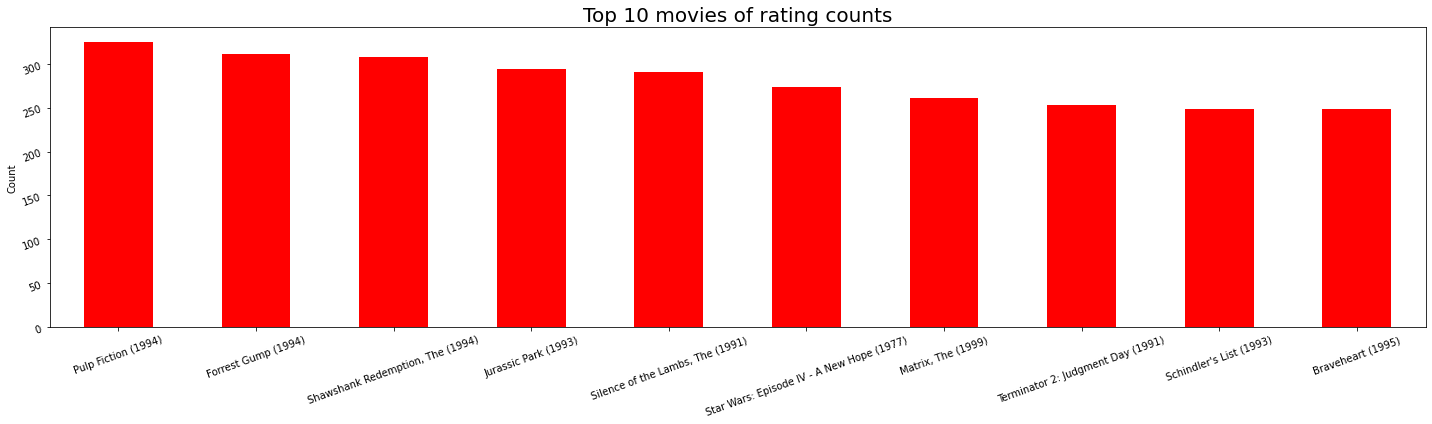

In [978]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (20,6))
all_movies['title'].value_counts()[:10].plot(kind = 'bar', ax = ax, color="red")
ax.set_title('Top 10 movies of rating counts', fontsize = 20)
ax.tick_params(labelrotation = 20)
ax.set_ylabel('Movies Title')
ax.set_ylabel('Count')
plt.tight_layout()

**Top 10 Users in the dataset based on ratings count**

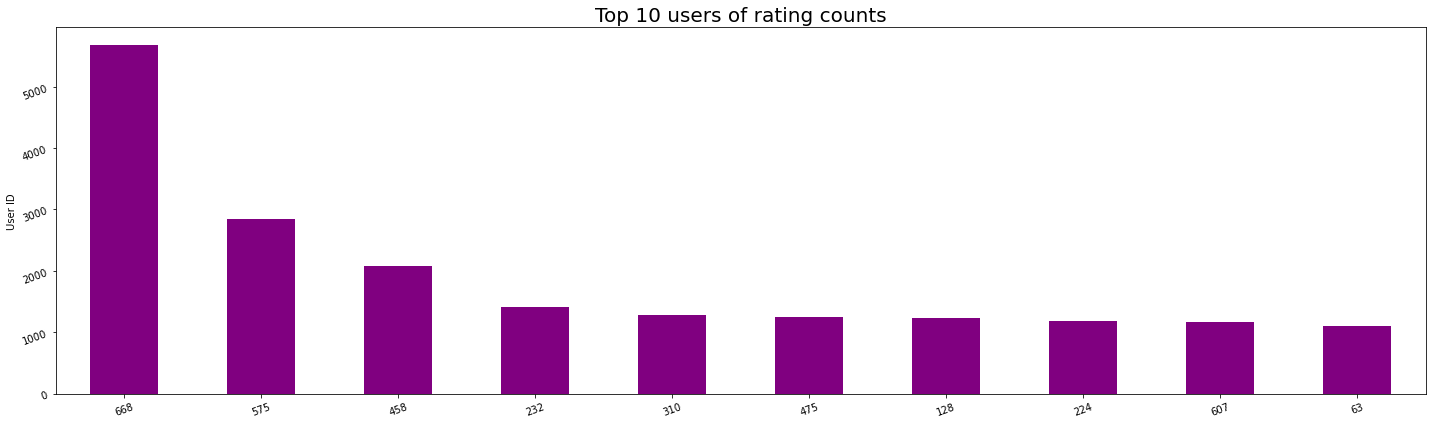

In [979]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (20,6))
ratings_df['userId'].value_counts()[:10].plot(kind = 'bar', ax = ax, color="purple")
ax.set_title('Top 10 users of rating counts', fontsize = 20)
ax.tick_params(labelrotation = 20)
ax.set_ylabel('Count')
ax.set_ylabel('User ID')
plt.tight_layout()

**Number of movies released per year**

In [980]:
all_movies["year"] = all_movies["title"].str.extract("\((\d{4})\)", expand=True)
year_counts = all_movies[["title", "year"]].groupby("year").size()

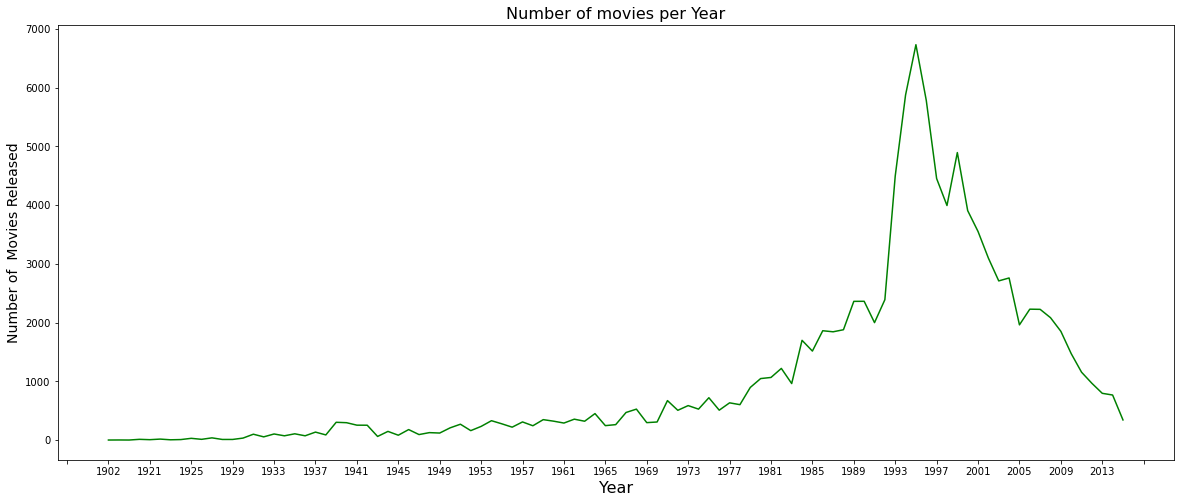

In [981]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(year_counts.index, year_counts.values,color='green')
ax.xaxis.set_major_locator(plt.MaxNLocator(30)) 
plt.title("Number of movies per Year", fontsize=16)
plt.xlabel("Year", fontsize= 16)
plt.ylabel("Number of  Movies Released", fontsize=14)
plt.show()

**Top watched Genres**

In [982]:
movies_df['genres'] = movies_df['genres'].replace(to_replace="(no genres listed)", value="")
generlist = movies_df['genres'].apply(lambda allgeners : str(allgeners).split("|"))
generlist


0        [Adventure, Animation, Children, Comedy, Fantasy]
1                           [Adventure, Children, Fantasy]
2                                        [Comedy, Romance]
3                                 [Comedy, Drama, Romance]
4                                                 [Comedy]
5                                [Action, Crime, Thriller]
6                                        [Comedy, Romance]
7                                    [Adventure, Children]
8                                                 [Action]
9                            [Action, Adventure, Thriller]
10                                [Comedy, Drama, Romance]
11                                        [Comedy, Horror]
12                        [Adventure, Animation, Children]
13                                                 [Drama]
14                            [Action, Adventure, Romance]
15                                          [Crime, Drama]
16                                        [Drama, Romanc

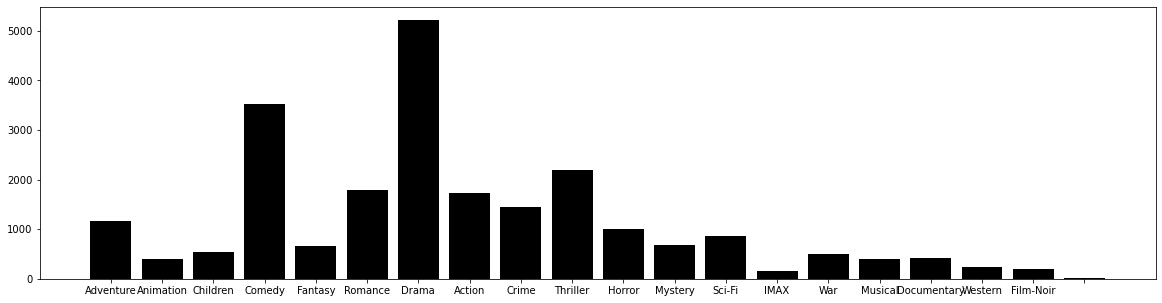

In [983]:
plt.figure(figsize=(20,5))
count = {}

for generlist_movie in generlist:
    for gener in generlist_movie:
        if(count.get(gener,False)):
            count[gener]=count[gener]+1
        else:
            count[gener] = 1
            
plt.bar(count.keys(),count.values(),color='black')
plt.show()

## Statistical Modelling

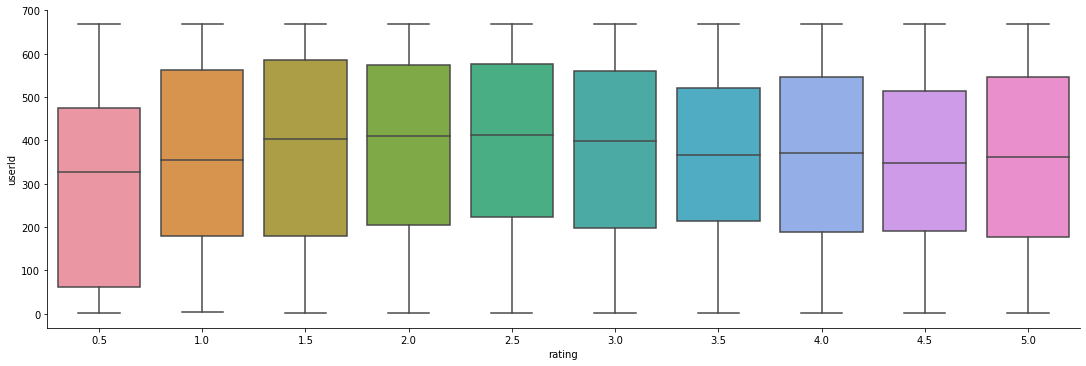

In [984]:
# Analysing ratings per customer
sns.catplot(y="userId", x="rating",data=all_movies, height=5,aspect=3,kind="box")
plt.show()

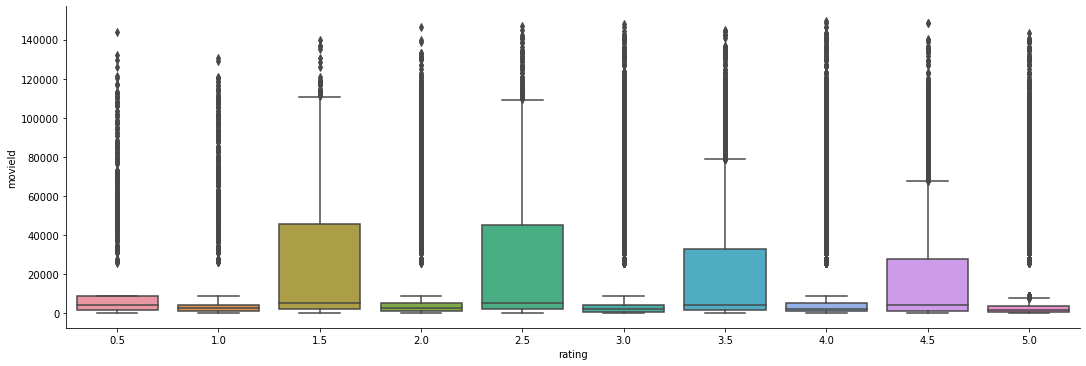

In [985]:
#Analysing ratings per movieId
sns.catplot(y="movieId", x="rating",data=all_movies, height=5,aspect=3,kind="box")
plt.show()

# Side Project: Unsupervised Learning
**How to cluster people in our dataset based on their rankings?**

### Feature Selection

In [986]:
# Creating new dataframe for avarage ratings per genres per user
ratings = ratings_df
movies = movies_df
genres= ['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'IMAX', 'War', 'Musical', 'Documentary', 'Western', 'Film-Noir' ]
#columns
column_names = ['avg_Adventure', 'avg_Animation', 'avg_Children', 'avg_Comedy', 'avg_Fantasy', 'avg_Romance', 'avg_Drama', 'avg_Action', 'avg_Crime', 'avg_Thriller', 'avg_Horror', 'avg_Mystery', 'avg_Sci-Fi', 'avg_IMAX', 'avg_War', 'avg_Musical', 'avg_Documentary', 'avg_Western', 'avg_Film-Noir' ]
#Empty frame
genre_ratings = pd.DataFrame()
#loop on genres
for genre in genres:      
  #Get genres
  genre_movies = movies[movies['genres'].str.contains(genre) ]
  #avarage mean of ratings for this genre
  avg_genre_votes_per_user = ratings[ratings['movieId'].isin(genre_movies['movieId'])].loc[:, ['userId', 'rating']].groupby(['userId'])['rating'].mean().round(2)
  #concate both empty dataframe with avg mean ratings
  genre_ratings = pd.concat([genre_ratings, avg_genre_votes_per_user], axis=1)
#add columns in empty dataframe
genre_ratings.columns = column_names
genre_ratings.head()


avg_Adventure  avg_Animation  avg_Children  avg_Comedy  avg_Fantasy  \
1           3.69           4.00          3.17        3.27         3.81   
2           4.00           4.50          4.33        3.55         4.25   
3           3.44           3.50          3.80        3.74         3.40   
4           4.24           4.75          4.33        4.02         4.25   
5           3.55           4.10          3.90        3.44         3.84   

   avg_Romance  avg_Drama  avg_Action  avg_Crime  avg_Thriller  avg_Horror  \
1         3.34       3.84        3.83       4.21          3.87        3.69   
2         3.75       4.36        3.89       4.33          3.92         NaN   
3         3.64       3.97        3.23       4.00          3.71        4.00   
4         4.16       4.34        3.79       3.94          3.72        3.50   
5         3.74       2.68        2.76       2.58          1.77        3.00   

   avg_Mystery  avg_Sci-Fi  avg_IMAX  avg_War  avg_Musical  avg_Documentary  \
1         3.81        3.40      3.88     4.20         4.00              0.5   
2         3.50        3.80       NaN      NaN         4.00              NaN   
3         4.25        3.33      4.00     3.67         3.67              5.0   
4         4.40        4.33       NaN     4.56         4.33              NaN   
5         2.67        3.67      4.28     0.50         4.09              NaN   

   avg_Western  avg_Film-Noir  
1          3.5           4.00  
2          NaN            NaN  
3          4.0            NaN  
4          4.2           4.33  
5          NaN            NaN

In [987]:
#Dropping null values
genre_ratings_cleaned=genre_ratings.dropna(axis=0, how='any')

In [988]:
genre_ratings_cleaned.head()

avg_Adventure  avg_Animation  avg_Children  avg_Comedy  avg_Fantasy  \
1            3.69           4.00          3.17        3.27         3.81   
7            3.57           3.50          2.40        3.50         3.21   
22           2.81           3.77          3.10        3.10         3.11   
28           3.44           3.75          3.62        3.43         3.09   
44           3.28           3.42          3.63        3.37         3.58   

    avg_Romance  avg_Drama  avg_Action  avg_Crime  avg_Thriller  avg_Horror  \
1          3.34       3.84        3.83       4.21          3.87        3.69   
7          3.83       3.44        3.74       3.85          3.72        3.57   
22         3.22       3.45        2.73       3.39          3.23        3.10   
28         3.71       3.55        3.25       3.40          3.32        4.00   
44         3.52       3.20        3.16       3.12          3.20        3.27   

    avg_Mystery  avg_Sci-Fi  avg_IMAX  avg_War  avg_Musical  avg_Documentary  \
1          3.81        3.40      3.88     4.20         4.00              0.5   
7          3.86        3.54      3.17     3.64         5.00              4.0   
22         3.43        2.82      4.50     2.55         2.72              2.5   
28         3.60        3.71      4.00     3.15         3.67              4.0   
44         3.58        3.35      0.50     3.22         3.08              4.5   

    avg_Western  avg_Film-Noir  
1          3.50            4.0  
7          3.00            5.0  
22         2.00            3.5  
28         3.17            4.0  
44         3.20            4.5

### Unsupervised machine learning algorithm

### Machine learning model training

In [989]:
X = genre_ratings_cleaned

In [990]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state = 1234)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=1234)

In [991]:
# Gives the cluster labels
clusters = kmeans.predict(X)

# Checking the size of the clusters
print(pd.Series(clusters).value_counts().sort_index())


0    32
1    33
2    13
3    37
4     4
dtype: int64


### Model evaluation

In [992]:
kmeans.inertia_

368.9080829966768

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[819.7902184873949, 530.214409608323, 431.0248622091888, 399.9215984111384, 368.9080829966768, 352.6583441803296, 332.31777840307865, 314.62962942919165, 297.970873289221, 291.3707516313206, 273.2709339689464, 261.7899090883459, 251.01311620602308, 241.45667471479507]


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

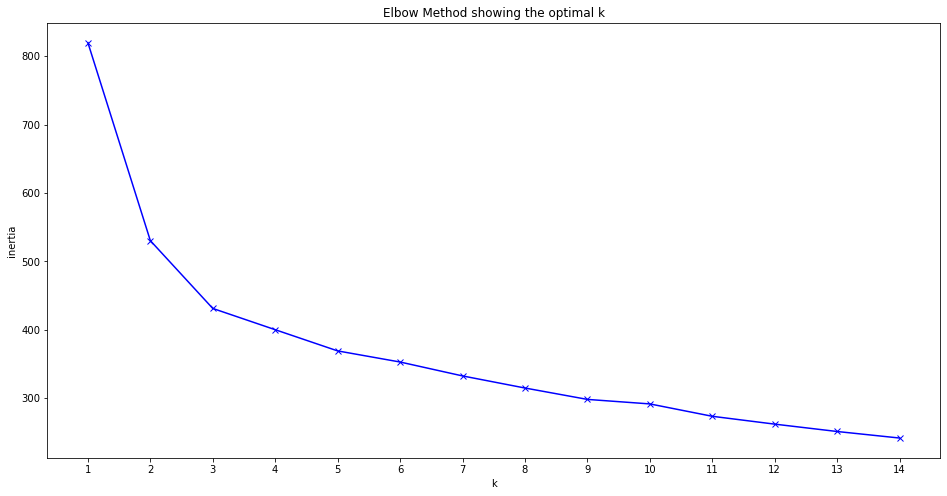

In [993]:
# Elbow method
K = range(1, 15)
print(list(K))
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

print(inertia)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[0.29373236562543786, 0.22814880270993268, 0.20695150036086268, 0.20838268600210894, 0.1300498969362907, 0.13565408710461146, 0.14912554035835857, 0.13715050333921391, 0.11390653749631564, 0.1253352546572033, 0.12445546207842398, 0.1294866599103044, 0.13256697598139228]


Text(0.5, 1.0, 'Silhouette Score showing the optimal k')

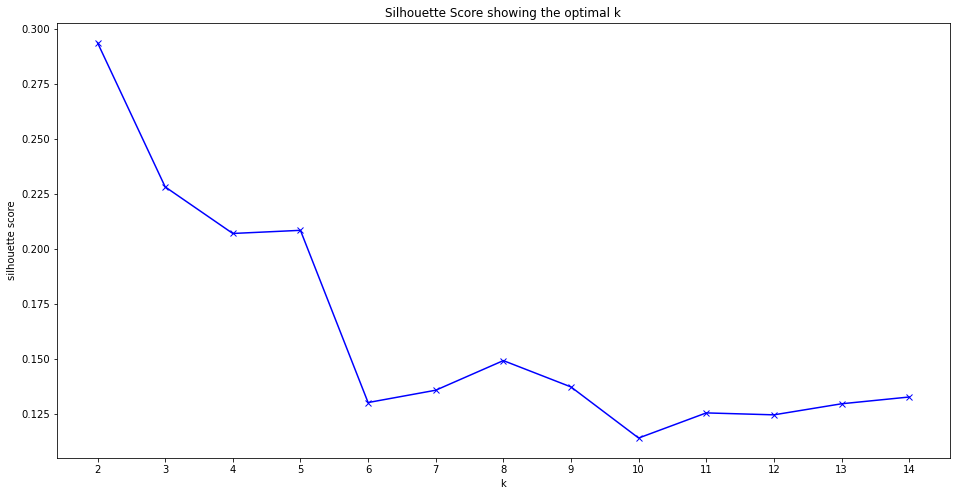

In [994]:
# Silhouette Score
from sklearn.metrics import silhouette_score

K = range(2, 15)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X)
    silhouette.append(silhouette_score(X, kmeans.predict(X)))

print(list(K))
print(silhouette)

plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Score showing the optimal k')

In [995]:
from sklearn import datasets
X_pca = genre_ratings_cleaned
pd.DataFrame(X_pca)

avg_Adventure  avg_Animation  avg_Children  avg_Comedy  avg_Fantasy  \
1             3.69           4.00          3.17        3.27         3.81   
7             3.57           3.50          2.40        3.50         3.21   
22            2.81           3.77          3.10        3.10         3.11   
28            3.44           3.75          3.62        3.43         3.09   
44            3.28           3.42          3.63        3.37         3.58   
47            3.71           4.20          4.45        3.77         4.57   
50            2.95           3.14          3.00        3.13         2.75   
54            3.05           2.96          2.67        2.94         3.09   
60            3.72           2.88          2.94        3.52         3.34   
61            2.61           3.38          2.25        3.04         3.59   
62            1.99           2.28          1.62        1.93         2.09   
63            3.03           3.20          2.97        2.88         2.70   
66            3.24           3.81          3.04        2.92         3.24   
69            3.42           3.04          2.40        3.00         3.15   
87            3.48           3.22          3.08        3.14         3.07   
88            4.03           4.14          4.05        4.06         4.08   
89            3.55           3.78          3.64        3.23         3.72   
109           4.09           4.52          3.94        4.11         4.04   
110           4.22           4.27          4.22        4.06         4.24   
113           3.34           3.53          3.43        3.34         3.46   
114           3.92           3.61          3.62        3.19         3.77   
115           2.29           2.60          2.00        2.96         2.43   
128           3.33           3.53          3.50        3.42         3.34   
130           2.33           2.81          1.84        2.15         2.78   
139           3.60           3.71          3.61        3.61         3.61   
140           2.83           3.00          3.00        2.88         3.20   
155           2.50           3.40          3.80        3.62         2.83   
156           3.82           3.56          3.46        3.71         3.65   
158           3.86           4.04          3.84        3.75         3.76   
160           3.93           3.93          3.83        4.07         3.92   
164           4.00           3.84          3.74        3.85         3.95   
166           3.68           3.94          3.88        3.89         3.89   
167           4.27           4.38          4.21        4.08         4.13   
168           3.50           3.59          3.65        3.42         3.52   
174           3.38           4.08          3.60        3.83         3.28   
177           3.14           3.24          3.11        3.04         3.14   
179           2.66           2.97          2.89        2.59         3.01   
180           3.68           3.35          3.27        3.59         3.55   
182           3.17           1.75          1.50        2.36         2.12   
189           4.09           2.80          1.75        3.65         4.55   
192           3.81           3.98          3.97        3.55         3.75   
198           3.96           4.25          4.11        3.98         3.85   
213           3.82           3.85          3.66        3.70         3.69   
218           4.00           4.13          3.92        4.22         4.21   
220           3.44           3.73          3.24        3.38         3.56   
224           3.38           3.60          3.16        3.28         3.38   
228           3.89           4.40          3.82        4.04         4.09   
232           3.89           3.78          3.53        3.72         3.74   
236           3.55           4.38          4.25        3.57         3.68   
238           3.62           4.10          4.05        3.75         3.88   
244           2.73           2.91          2.75        2.92         2.97   
255           3.24           3.31          3.05      

In [996]:
#PCA
from sklearn.decomposition import PCA

In [997]:
pca = PCA()
pca.fit(X_pca)
components = pca.transform(X_pca)
print(pd.DataFrame(components))

           0         1         2         3         4         5         6   \
0   -0.285716  1.835509 -2.767430  0.701784 -0.149658 -0.211896  0.385561   
1   -0.581119 -0.796584 -0.290826  0.084309 -1.323625 -0.381874  1.116761   
2    1.791933  1.360548 -0.374814 -0.692462 -1.026744  0.465013 -0.811323   
3   -0.242593  0.210266  0.442843 -0.169782 -0.606031  0.199707 -0.606085   
4    1.108763 -2.034881  0.578048  1.758458 -0.270551 -0.973317 -0.421386   
5   -2.276138  0.311815  1.096467  1.698357  0.241560 -0.073285  0.083342   
6    1.889953  0.462014  0.833141  0.372287  0.101843  0.041905  0.104539   
7    1.454071 -0.184990 -0.609375 -0.095939 -0.076471  0.132159  0.220462   
8   -0.444982 -0.817025  0.237161 -0.826710 -0.423023  0.577709  0.145275   
9    1.424960 -0.583542 -0.306686  0.921935 -0.428810 -0.151800  0.888347   
10   4.804617 -0.429959 -0.201352 -0.864298 -0.771873  0.467510  0.413325   
11   1.552936  0.006490  0.231768 -0.200503 -0.053728 -0.346900  0.308364   

In [998]:
round(pd.DataFrame(pca.explained_variance_ratio_), 5)

0
0   0.56077
1   0.10401
2   0.08434
3   0.06401
4   0.04627
5   0.03160
6   0.02138
7   0.01770
8   0.01460
9   0.01322
10  0.01142
11  0.00779
12  0.00654
13  0.00560
14  0.00388
15  0.00238
16  0.00187
17  0.00168
18  0.00095

# Recommendation Engines
**Which approach delivers the best recommendation model for movies?**

**Testing Content based System vs. Collaborative Systems?**

**Own recommendation model vs. machine learning model**

## Content Based Filtering Model

**Calculates top movies to be recommended to user based on movies user has watched and removes already watched movie from recommended list.**

*input*: user Id

*output*: Top movies based on movies user has watched

In [1008]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [1009]:
tf = tf_idf.fit_transform(movies_df['genres'])

In [1047]:
cosine_sim_movies = linear_kernel(tf, tf)

content_based_rec = all_movies['movieId'].value_counts()
content_based_rec_list =  content_based_rec[:10]
def get_recommendations_by_geners(title, sim_movies=cosine_sim_movies):
    #Index of the movie that matches the movies title
    movie_index = movies_df.loc[movies_df['title'].isin([title])]
    movie_index = movie_index.index
    #Pairwsie similarity scores of all movies with this movie
    movies_similarity_score = list(enumerate(sim_movies[movie_index][0]))\
    #Sort the movies based on the similarity scores
    movies_similarity_score = sorted(movies_similarity_score, key=lambda x: x[1], reverse=True)
    #Scores of the 10 most similar movies
    movies_similarity_score = movies_similarity_score[1:10]
    # get movie indices
    indices_movie = [i[0] for i in movies_similarity_score]
    return movies_df['title'].iloc[indices_movie]

In [1049]:
userId=input("Input User Id to recommend Top movies based on movies user has watched (content based): ")
userId = int(userId)

recommended = []
movie_list = []
user_rated = ratings_df[ratings_df["userId"]== userId]
for key, row in user_rated.iterrows():
  movie_list.append((movies_df["title"][row["movieId"]==movies_df["movieId"]]).values) 
for index, movie in enumerate(movie_list):
  for key, movie_recommended in get_recommendations_by_geners(movie[0]).iteritems():
    recommended.append(movie_recommended)
content_based_rec = all_movies['movieId'].value_counts()

#remove already watched movie by user    
for movie_title in recommended:
  if movie_title in movie_list:
    recommended.remove(movie_title)
    
#remove duplicate movies to user recommendations   
def Remove_dups(duplicate):
    final_list = []
    for num in duplicate:
        if num not in final_list:
            final_list.append(num)
    return final_list
recommended = Remove_dups(recommended[:20])

#print top 10 movies for recommendation
print( "\n".join( repr(e) for e in recommended[:5] ))

Input User Id to recommend Top movies based on movies user has watched (content based): 2
'Antz (1998)'
'Toy Story 2 (1999)'
'Adventures of Rocky and Bullwinkle, The (2000)'
"Emperor's New Groove, The (2000)"
'Monsters, Inc. (2001)'


In [1012]:
#checking original data
all_movies[all_movies["userId"]== userId]

movieId                                              title  \
394          5                 Father of the Bride Part II (1995)   
570          7                                     Sabrina (1995)   
786         11                     American President, The (1995)   
1254        21                                  Get Shorty (1995)   
1893        34                                        Babe (1995)   
2026        36                            Dead Man Walking (1995)   
2115        39                                    Clueless (1995)   
2315        45                                  To Die For (1995)   
2618        50                         Usual Suspects, The (1995)   
3720       105              Bridges of Madison County, The (1995)   
4365       141                               Birdcage, The (1996)   
4471       144                      Brothers McMullen, The (1995)   
4584       150                                   Apollo 13 (1995)   
5389       165                  Die Hard: With a Vengeance (1995)   
5903       185                                    Net, The (1995)   
6569       222                           Circle of Friends (1995)   
6587       223                                      Clerks (1994)   
6980       232        Eat Drink Man Woman (Yin shi nan nu) (1994)   
7204       246                                 Hoop Dreams (1994)   
7834       261                                Little Women (1994)   
8072       272                 Madness of King George, The (1994)   
8169       277                      Miracle on 34th Street (1994)   
8234       281                               Nobody's Fool (1994)   
8448       292                                    Outbreak (1995)   
8709       296                                Pulp Fiction (1994)   
9047       300                                   Quiz Show (1994)   
10303      339                     While You Were Sleeping (1995)   
10412      342                            Muriel's Wedding (1994)   
10634      345  Adventures of Priscilla, Queen of the Desert, ...   
10697      348                       Bullets Over Broadway (1994)   
10726      349                    Clear and Present Danger (1994)   
10859      350                                 Client, The (1994)   
11078      356                                Forrest Gump (1994)   
11388      357                 Four Weddings and a Funeral (1994)   
11798      367                                   Mask, The (1994)   
11944      368                                    Maverick (1994)   
12151      373                               Red Rock West (1992)   
12238      377                                       Speed (1994)   
12470      380                                   True Lies (1994)   
12801      410                        Addams Family Values (1993)   
12975      417                                   Barcelona (1994)   
13745      454                                   Firm, The (1993)   
13908      457                               Fugitive, The (1993)   
14310      471                        Hudsucker Proxy, The (1994)   
14521      477              What's Love Got to Do with It? (1993)   
14554      480                               Jurassic Park (1993)   
14879      485                            Last Action Hero (1993)   
15124      497                      Much Ado About Nothing (1993)   
15197      500                              Mrs. Doubtfire (1993)   
15425      508                                Philadelphia (1993)   
15513      509                                  Piano, The (1993)   
15631      515                     Remains of the Day, The (1993)   
15873      527                            Schindler's List (1993)   
16126      529                 Searching for Bobby Fischer (1993)   
16213      532                                  Serial Mom (1994)   
16303      537                                      Sirens (1994)   
16320      538                   Six Degrees of Separation (1993)   
16345

## Collabrative filtering

## Memory Based Collaborative Filtering

In [1013]:
all_movies.head()

movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
2        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
3        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
4        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   

   userId  rating                     timestamp  year  
0     2.0     5.0 1970-01-01 00:00:00.859046895  1995  
1     5.0     4.0 1970-01-01 00:00:01.303501039  1995  
2     8.0     5.0 1970-01-01 00:00:00.858610933  1995  
3    11.0     4.0 1970-01-01 00:00:00.850815810  1995  
4    14.0     4.0 1970-01-01 00:00:00.851766286  1995

### Item-Item based collaborative filtering
**Recommend top10 movies to user based on item-item Similarity. Based on user id of the user for whem is supposed to be recommended, system finds the movies which the user rated before between 3.5 and 5. Based on Item-Item similarity approach the system than recommends movies, which are similar to them**


*input*: user_id

*output*: Recommend top 10 movies based on item-item similarity.

In [1014]:
#create pivot table of ratings with movie id index and user id in column
item_item_matrix = all_movies.pivot_table(index=['movieId'],columns=['userId'],values='rating').reset_index(drop=True)
#replace null values with 0
item_item_matrix.fillna( 0, inplace = True )
item_item_matrix.shape

(10325, 668)

In [1017]:
# calculating a movie movie matrix
from sklearn.metrics import pairwise_distances
#cosine movie similarity 
movie_similarity = 1 - pairwise_distances( item_item_matrix, metric="cosine" )
#diagonal fill with 0 due to same 
np.fill_diagonal( movie_similarity, 0 )
#convert to dataframe
item_item_matrix = pd.DataFrame( movie_similarity )
item_item_matrix.head()

0         1         2         3         4         5         6      \
0  0.000000  0.899131  0.822602  0.584695  0.808377  0.901100  0.803461   
1  0.899131  0.000000  0.808394  0.476160  0.778977  0.897119  0.801260   
2  0.822602  0.808394  0.000000  0.629963  0.882286  0.828313  0.813171   
3  0.584695  0.476160  0.629963  0.000000  0.606595  0.575100  0.564219   
4  0.808377  0.778977  0.882286  0.606595  0.000000  0.827483  0.861761   

      7         8         9         10        11        12        13     \
0  0.255736  0.573595  0.910280  0.880224  0.635138  0.463459  0.484030   
1  0.243716  0.454242  0.913869  0.838054  0.712303  0.509330  0.587914   
2  0.300704  0.653292  0.805179  0.835900  0.671657  0.509810  0.634872   
3  0.317449  0.612209  0.590742  0.626266  0.349552  0.208030  0.255500   
4  0.302867  0.589316  0.812297  0.842405  0.651045  0.323481  0.709908   

      14        15        16        17        18        19        20     \
0  0.682268  0.895000  0.834919  0.681065  0.836914  0.647298  0.894951   
1  0.643364  0.880470  0.737952  0.646682  0.869763  0.598188  0.872987   
2  0.648463  0.777517  0.789794  0.528230  0.688975  0.522126  0.823867   
3  0.716973  0.571863  0.676171  0.443043  0.416559  0.538547  0.644364   
4  0.646769  0.813244  0.825633  0.504657  0.623307  0.460625  0.823292   

      21        22        23        24        25        26        27     \
0  0.782136  0.742968  0.791756  0.849079  0.613012  0.343219  0.593619   
1  0.747475  0.628642  0.840791  0.791173  0.518575  0.360599  0.590532   
2  0.840576  0.661644  0.810152  0.839435  0.480871  0.336402  0.736749   
3  0.653798  0.651919  0.418717  0.664414  0.354833  0.642217  0.642407   
4  0.869402  0.649653  0.820843  0.860164  0.464848  0.317714  0.790370   

      28        29        30        31        32        33        34     \
0  0.785151  0.463403  0.744153  0.958017  0.248363  0.916448  0.400760   
1  0.721980  0.578956  0.801836  0.899880  0.239630  0.850451  0.535664   
2  0.629339  0.603253  0.792705  0.807675  0.167123  0.826842  0.570091   
3  0.429947  0.334449  0.532003  0.592402  0.116127  0.664685  0.273508   
4  0.541826  0.674169  0.822713  0.776070  0.151389  0.846402  0.647949   

      35        36        37        38        39        40        41     \
0  0.844078  0.901064  0.418679  0.671027  0.566464  0.593706  0.811336   
1  0.819950  0.874767  0.408326  0.650675  0.459089  0.435599  0.814979   
2  0.814656  0.834354  0.413468  0.728427  0.430944  0.614297  0.704358   
3  0.544316  0.577600  0.533068  0.588939  0.469737  0.710583  0.476150   
4  0.803055  0.864461  0.361101  0.785235  0.421705  0.565000  0.574004   

      42        43        44        45        46        47        48     \
0  0.753797  0.497752  0.943892  0.817059  0.322114  0.958025  0.716347   
1  0.744080  0.609026  0.908492  0.849406  0.329395  0.890211  0.657828   
2  0.811333  0.644997  0.787450  0.738106  0.284816  0.775398  0.773344   
3  0.596529  0.444590  0.564566  0.535863  0.612569  0.583869  0.615101   
4  0.839058  0.711291  0.762392  0.757506  0.258885  0.779866  0.815138   

      49        50        51        52        53        54        55     \
0  0.371892  0.483314  0.327062  0.460326  0.724198  0.400221  0.683170   
1  0.500419  0.351303  0.305251  0.587676  0.691364  0.516700  0.769589   
2  0.542348  0.555893  0.355080  0.623893  0.719810  0.553550  0.786426   
3  0.168809  0.676036  0.583860  0.379613  0.575117  0.191534  0.361782   
4  0.626834  0.559562  0.301363  0.693703  0.770323  0.637097  0.731141   

      56        57        58        59        60        61        62     \
0  0.481504  0.789336  0.596263  0.463072  0.561020  0.639464  0.433180   
1  0.317466  0.780793  0.568022  0.381871  0.572349  0.535737  0.281757   
2  0.613310  0.797474  0.558685  0.436712  0.589186  0.592940  0.537694   
3  0.673336  0.561892  0.277155  0.309110  0.288279  0.385663  0.699751   
4  0.573193  0.825108  

In [1026]:
user_id=input("Input User Id to Recommend top10 movies to user based on item-item Similarity: ")
#get movies title in between 3.5 to 5 ratings matching with user_id user rated
user_movie= all_movies[(all_movies.userId==user_id) & all_movies.rating.isin([5,3.5])][['title']]
#take titles list and fetch similar items on title basis for this user
fetch_similar_items(user_movie)
#sort values by similarity
sorted_movies_as_per_userChoice=movies_df.sort_values( ["similarity"], ascending = False )
sorted_movies_as_per_userChoice=sorted_movies_as_per_userChoice[sorted_movies_as_per_userChoice['similarity'] >=0.45]['movieId']
recommended_movies=list()
df_recommended_item=pd.DataFrame()

#get movies ids of this user in ratings data
user2Movies= ratings_df[ratings_df['userId']== user_id]['movieId']
for movieId in sorted_movies_as_per_userChoice:
    if movieId not in user2Movies:
    #new dataframe for rating of these movieIds
        df_new= ratings_df[(ratings_df.movieId==movieId)]
    #concate two dataframes for movies ids not in user2Movies variable
        df_recommended_item=pd.concat([df_recommended_item,df_new])
        b=df_recommended_item.sort_values(["rating"], ascending = False )[1:5000] 
    #best 10 movies
        best10=df_recommended_item.sort_values(["rating"], ascending = False )[1:10] 
best10['movieId']
movie_titles= list()
#get title movies
for id in b['movieId']:
    final_output = movies_df[movies_df['movieId']==id]['title'].values
    recommended_movies.append(final_output)
    
#remove duplicates in recomendations

movie_list = list()
for movie in recommended_movies:
    if movie not in movie_list:
        movie_list.append(movie) 
movie_list = np.array(movie_list[:10])
#print(movie_list)

for x in movie_list:
    for a in x:
        print(a)

Input User Id to Recommend top10 movies to user based on item-item Similarity: 2


C:\Users\broth\anaconda3\envs\kittycat\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
C:\Users\broth\anaconda3\envs\kittycat\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


GoldenEye (1995)
Shawshank Redemption, The (1994)
Bad Boys (1995)
Independence Day (a.k.a. ID4) (1996)
Harriet the Spy (1996)
Kicking and Screaming (1995)
Mr. Holland's Opus (1995)
Mask, The (1994)
Renaissance Man (1994)
Lion King, The (1994)



### User-Item based collaborative filtering
**Recommend top10 movies to user based on User-User Similarity. On basis of that, recommendation system finds the user which is similar to that user for whom movies should be recommend and than recommends movies, which the similar movie has watched.**

Input: user_id to whom movie needs to be recommended

Output: movieIds to user based on user-item similarity movies which user hasn't watched as per User Similarity.


In [1019]:
#create pivot table of ratings with user_id index and movie_id in column
user_item_matrix = all_movies.pivot_table(index=['userId'],columns=['movieId'],values='rating').reset_index(drop=True)
#replace null values with 0
user_item_matrix.fillna( 0, inplace = True )
user_item_matrix.head()

movieId  1       2       3       4       5       6       7       8       \
0           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1           5.0     0.0     2.0     0.0     3.0     0.0     0.0     0.0   
2           0.0     0.0     0.0     0.0     3.0     0.0     3.0     0.0   
3           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4           4.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

movieId  9       10      11      12      13      14      15      16      \
0           0.0     0.0     0.0     0.0     0.0     0.0     0.0     4.0   
1           0.0     0.0     0.0     0.0     0.0     4.0     0.0     0.0   
2           0.0     0.0     4.0     0.0     0.0     0.0     0.0     0.0   
3           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

movieId  17      18      19      20      21      22      23      24      \
0           0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.5   
1           5.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2           0.0     0.0     0.0     0.0     5.0     0.0     0.0     0.0   
3           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

movieId  25      26      27      28      29      30      31      32      \
0           0.0     0.0     0.0     0.0     0.0     0.0     0.0     4.0   
1           3.0     0.0     0.0     0.0     0.0     0.0     0.0     3.0   
2           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3           0.0     0.0     0.0     0.0     0.0     4.0     0.0     5.0   
4           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

movieId  33      34      35      36      39      40      41      42      \
0           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1           0.0     0.0     0.0     5.0     0.0     0.0     0.0     0.0   
2           0.0     5.0     0.0     4.0     4.0     0.0     0.0     0.0   
3           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

movieId  43      44      45      46      47      48      49      50      \
0           0.0     0.0     0.0     0.0     4.0     0.0     0.0     4.0   
1           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2           0.0     0.0     5.0     0.0     0.0     0.0     0.0     5.0   
3           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

movieId  52      53      54      55      57      58      59      60      \
0           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1           4.0     0.0     0.0     0.0     0.0     4.0     0.0     0.0   
2           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

movieId  61      62      63      64      65      66      68      69      \
0           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1           0.0     5.0     0.0     0.0     0.0     0.0     0.0     0.0   
2           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4           0.0     0.0     3.0     0.0     0.0     0.0     0.0     0.0   

movieId  70      71      72      73      74      75      76      78      \
0           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4           0.0  

In [1020]:
#cosine movie similarity 
movie_similarity = 1 - pairwise_distances(user_item_matrix, metric="cosine" )
#diagonal fill with 0 due to same 
np.fill_diagonal( movie_similarity, 0 )
#convert to dataframe
user_item_matrix = pd.DataFrame( movie_similarity )
user_item_matrix.head()

0         1         2         3         4         5         6    \
0  0.000000  0.101113  0.210044  0.128766  0.057896  0.077130  0.358090   
1  0.101113  0.000000  0.115559  0.034610  0.032705  0.028305  0.062914   
2  0.210044  0.115559  0.000000  0.058208  0.044426  0.012816  0.084522   
3  0.128766  0.034610  0.058208  0.000000  0.019298  0.005781  0.059089   
4  0.057896  0.032705  0.044426  0.019298  0.000000  0.053378  0.080822   

        7         8         9         10        11        12        13   \
0  0.097434  0.239189  0.026663  0.175067  0.059797  0.076697  0.094746   
1  0.471918  0.194232  0.000000  0.159791  0.019189  0.000000  0.510366   
2  0.066620  0.459703  0.068454  0.230443  0.006206  0.052054  0.144890   
3  0.024420  0.050572  0.000000  0.111763  0.007258  0.020546  0.025739   
4  0.041536  0.023168  0.011915  0.069307  0.000000  0.011325  0.034050   

        14        15        16        17        18       19        20   \
0  0.089077  0.204081  0.306639  0.268693  0.062818  0.04241  0.171823   
1  0.000000  0.119452  0.060576  0.015841  0.000000  0.00000  0.021880   
2  0.036332  0.295242  0.065617  0.094354  0.016564  0.00000  0.029878   
3  0.010197  0.043945  0.054335  0.048233  0.026151  0.00000  0.048552   
4  0.058388  0.022178  0.076139  0.104778  0.003844  0.02762  0.006158   

        21        22        23        24        25        26        27   \
0  0.209750  0.172704  0.170970  0.067370  0.156348  0.114060  0.226782   
1  0.063312  0.019659  0.011385  0.032258  0.000000  0.028087  0.174960   
2  0.139436  0.039739  0.088832  0.137366  0.053577  0.018168  0.239785   
3  0.046070  0.039410  0.243839  0.009151  0.063394  0.079677  0.093310   
4  0.086743  0.033200  0.022431  0.021185  0.058511  0.031622  0.064019   

        28        29        30        31        32        33        34   \
0  0.254053  0.385564  0.182013  0.197529  0.157760  0.077971  0.113964   
1  0.215953  0.102826  0.155587  0.077349  0.024646  0.061783  0.374950   
2  0.308629  0.091503  0.325406  0.113006  0.057971  0.012403  0.098104   
3  0.064089  0.064477  0.050218  0.269361  0.195253  0.062854  0.043024   
4  0.054030  0.122683  0.064229  0.033532  0.013453  0.050371  0.000000   

        35        36        37        38        39        40        41   \
0  0.236894  0.126540  0.240310  0.216824  0.008492  0.183843  0.112396   
1  0.000000  0.054339  0.095952  0.065593  0.000000  0.049911  0.055395   
2  0.411714  0.067409  0.097354  0.198506  0.000000  0.110845  0.047057   
3  0.039172  0.244610  0.064976  0.114834  0.000000  0.064690  0.062404   
4  0.081782  0.000000  0.193116  0.018462  0.000000  0.105102  0.029806   

        42        43        44        45        46        47        48   \
0  0.134784  0.296674  0.207879  0.205374  0.160455  0.000000  0.052105   
1  0.000000  0.047195  0.070218  0.072818  0.157181  0.012264  0.103406   
2  0.000000  0.073448  0.069118  0.087864  0.301790  0.073382  0.095315   
3  0.071477  0.120891  0.150348  0.134112  0.124000  0.000000  0.068055   
4  0.060174  0.063481  0.024347  0.062539  0.078183  0.000000  0.003881   

        49        50        51        52        53        54        55   \
0  0.168134  0.188486  0.152069  0.165697  0.247637  0.107566  0.189066   
1  0.116187  0.000000  0.025334  0.000000  0.081155  0.004744  0.000000   
2  0.138057  0.211930  0.042607  0.000000  0.099431  0.023014  0.033639   
3  0.208650  0.059484  0.010732  0.055088  0.054603  0.064057  0.044258   
4  0.045973  0.056749  0.077963  0.011882  0.100864  0.021364  0.069935   

        56        57        58        59        60        61        62   \
0  0.247747  0.021875  0.176027  0.258559  0.164192  0.269260  0.249256   
1  0.000000  0.018330  0.018268  0.056703  0.048112  0.076271  0.051688   
2  0.073402  0.000000  0.052894  0.081318  0.057455  0.131562  0.116602   
3  0.042661  0.097757  0.052909  0.051673  0.146383  0.091940  0.040763   
4  0.027100  0.000000  0.000000

In [571]:
#get user with maximum similarity in user_item_matrix
similar_users = user_item_matrix.idxmax(axis=1).to_frame()
#create similar_user 
similar_users.columns=['similar_user']

similar_users.head()

similar_user
0           347
1            95
2           244
3           321
4            37

In [1021]:
movieId_recommended=list()
top_title=list()
user_id=input("Input User Id to Recommend top10 movies to user based on user-item Similarity: ")
#get movies in ratings column with this userId
user_Movies= ratings_df[ratings_df['userId']== userId]['movieId']
#get similar user using index location
sim_user=similar_users.iloc[0,0]
#create empity dataframe with columns
df_recommended=pd.DataFrame(columns=['movieId','title','genres','userId','rating','timestamp'])
#for every movie with similar user in ratings dataframe
for movieId in ratings_df[ratings_df['userId']== sim_user]['movieId']:
  #if user not watched already
  if movieId not in user_Movies:
    #get all movies match with similar user and this movies id which user has not watched
    df_new= all_movies[(all_movies.userId==sim_user) & (all_movies.movieId==movieId)]
    #Combine dataframe
    df_recommended=pd.concat([df_recommended,df_new])
    #top 10 movies
    top_s10=df_recommended.sort_values(['rating'], ascending = False )[1:10]  
    top_s10.reset_index(drop=True, inplace=True)

top_title = top_s10['title'].values

print( "\n".join( repr(e) for e in top_title ))

Input User Id to Recommend top10 movies to user based on user-item Similarity: 3
'Blackadder Back & Forth (1999)'
'Good bye, Lenin! (2003)'
'Departed, The (2006)'
'Cinema Paradiso (Nuovo cinema Paradiso) (1989)'
'Pirates of the Caribbean: The Curse of the Black Pearl (2003)'
'Indiana Jones and the Last Crusade (1989)'
'Ratatouille (2007)'
'Hot Fuzz (2007)'
'2001: A Space Odyssey (1968)'


### Model based collaborative filtering - own approach

In [578]:
ratings_matrix = ratings_df.pivot(index = 'userId', columns ='movieId', values = 'rating').fillna(0)
ratings_matrix.head()

movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
1           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2           5.0     0.0     2.0     0.0     3.0     0.0     0.0     0.0   
3           0.0     0.0     0.0     0.0     3.0     0.0     3.0     0.0   
4           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5           4.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

movieId  9       10      ...  144482  144656  144976  146344  146656  146684  \
userId                   ...                                                   
1           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
2           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
3           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
4           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
5           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   

movieId  146878  148238  148626  149532  
userId                                   
1           0.0     0.0     0.0     0.0  
2           0.0     0.0     0.0     0.0  
3           0.0     0.0     0.0     0.0  
4           0.0     0.0     0.0     0.0  
5           0.0     0.0     0.0     0.0  

[5 rows x 10325 columns]

In [579]:
#mean of rating for all user in above matrix
ratings_mean_per_user = np.mean(ratings_matrix, axis = 1)
total_users = ratings_mean_per_user.size
total_movies = len(movies_df)
# get ratings dimentions and making the user_ratings_mean vertical by reshaping
Ratings_dimentions = ratings_matrix - ratings_mean_per_user.values.reshape(-1,1) 
#sparsity formula
sparsity = round(1.0 - len(ratings_matrix) / float(total_users * total_movies), 3)
#percentage of sparsity
print('The sparsity level of ratings dataset is ' +  str(sparsity * 100) + '%')

The sparsity level of ratings dataset is 100.0%


**Single Value Decompositon (SVD)**

**Singular value decomposition (SVD) is the methode of matrix factorization. At a high level, SVD is an algorithm that decomposes a matrix (ratings_matrix) into the best lower rank and smaller. Mathematically, it decomposes a matrix into a two unitary matrices and a diagonal matrix: **Matrix -> U*S*Vt** .


U is the left singular vectors (user "features" matrix).

S is the diagonal matrix of singular values.

Vt is the right singluar vectors (movie "features" matrix).


In [580]:
from scipy.sparse.linalg import svds

In [581]:
U, S, Vt = svds(Ratings_dimentions, k = 50)

In [582]:
U

array([[-8.99150529e-03,  2.06688001e-02, -1.82787409e-02, ...,
        -1.33980545e-02, -8.91701031e-03, -4.34594868e-02],
       [ 7.02211897e-03,  8.52369117e-03, -2.06093463e-03, ...,
        -1.35483022e-02,  1.10831323e-02, -7.28917571e-03],
       [ 7.60339840e-03, -2.16570667e-02, -1.48513521e-02, ...,
        -5.91162090e-02,  3.32692847e-02, -1.98287879e-02],
       ...,
       [-1.59964621e-02, -1.52558874e-03,  2.98470628e-02, ...,
         4.11685012e-02,  2.10758551e-02, -3.78406551e-02],
       [-6.06185423e-03, -3.05389137e-03,  6.45705004e-03, ...,
        -1.88700152e-02, -4.57420244e-03, -2.51302781e-02],
       [-2.00714910e-04, -1.65049393e-02, -1.31357315e-02, ...,
         3.65966498e-01,  3.21726441e-02, -9.29570839e-02]])

In [583]:
#digonal matrix
S = np.diag(S)
S

array([[ 67.75583954,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,  68.10174582,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,  68.41554944, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ..., 188.46765204,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
        229.09814764,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 480.87123202]])

In [584]:
Vt

array([[-1.02328482e-02,  4.48934821e-03,  5.01349447e-03, ...,
        -1.01312524e-03,  2.52574324e-03, -1.24258501e-03],
       [-9.77255054e-03,  2.85802295e-03,  2.42247054e-03, ...,
        -1.75274343e-03,  5.70463009e-03, -2.41625509e-03],
       [ 3.72650563e-02, -4.76742953e-03, -8.06559214e-03, ...,
        -7.77121997e-04,  3.84524967e-03, -1.10388500e-03],
       ...,
       [-3.87145998e-02, -3.75903769e-02, -2.60274369e-02, ...,
        -3.56085998e-03,  9.07085798e-03, -3.30080119e-03],
       [ 1.81274869e-02, -8.06214340e-04,  1.35117605e-02, ...,
         5.58976785e-05,  2.94962850e-04, -1.20500077e-04],
       [-8.03164042e-02, -3.17056020e-02, -9.42407409e-03, ...,
         4.40677960e-03,  2.13542969e-03,  4.26939746e-03]])

In [585]:
print('Shape of U: ', U.shape)
print('Shape of S: ', S.shape)
print('Shape of Vt: ', Vt.shape)

Shape of U:  (668, 50)
Shape of S:  (50, 50)
Shape of Vt:  (50, 10325)


In [586]:
#Dot product 
ratings_predicted_for_users = np.dot(np.dot(U, S), Vt) + ratings_mean_per_user.values.reshape(-1,1)
preds = pd.DataFrame(ratings_predicted_for_users, columns = ratings_matrix.columns)
preds.head()
#print('All user predicted rating : ', ratings_predicted_for_users.shape)

movieId    1         2         3         4         5         6         7       \
0        2.340908  0.116324  0.182888 -0.036764  0.063752  1.539780  0.101114   
1        3.151773  0.206667  1.666566 -0.077891  1.485149  1.730959  1.173952   
2        0.991437  0.829049  0.553093  0.183691  0.576599  0.331009  0.773242   
3        0.619139 -0.217151 -0.238869  0.127655 -0.099769  0.117654 -0.102186   
4        1.636123  0.410191  0.087905 -0.022208  0.083438 -0.128785 -0.018924   

movieId    8         9         10      ...    144482    144656    144976  \
0       -0.025708  0.194963  0.992245  ... -0.014009 -0.023786 -0.005130   
1        0.023590  0.766577 -0.211013  ... -0.004981 -0.011264 -0.008696   
2        0.034812  0.014922  1.706305  ...  0.002468 -0.001017  0.010078   
3       -0.058419 -0.008662  0.010188  ...  0.014678  0.037013 -0.033948   
4        0.016518  0.031642  0.311503  ...  0.026540 -0.006282  0.001862   

movieId    146344    146656    146684    146878    148238    148626    149532  
0       -0.010363 -0.048034 -0.036938 -0.020261 -0.019312  0.007349 -0.028260  
1       -0.008589 -0.010318  0.017270  0.008911 -0.010372 -0.046182 -0.012156  
2       -0.004328  0.012828  0.018177  0.008082 -0.002121 -0.041568  0.000087  
3        0.015854  0.066009 -0.011781 -0.011998  0.029960 -0.044401  0.044066  
4       -0.000280  0.020807  0.030318  0.021845 -0.004282  0.008430 -0.008283  

[5 rows x 10325 columns]

In [588]:
user_ID = input("input user Id to recommend top 10 movies based on Model Based COllaborative filtering: ")
userID = int(user_ID)
# User ID starts at 1 and row from 1 therefore row will be 0
user_row_number = userID - 1 
#predictions by SVD
predictions = preds
sorted_user_predictions = predictions.iloc[user_row_number].sort_values(ascending=False) # User ID starts at 1

# Get the user's data and merge in the movie information.
user_data = all_movies[all_movies.userId == (userID)]
users = (user_data.merge(all_movies, how = 'left', left_on = 'movieId', right_on = 'movieId'))
print('User {0} has already rated {1} movies.'.format(userID, users.shape[0]))

#Recommend the highest predicted rating movies that the user hasn't seen yet.
recommend = (movies[movies['movieId'].isin(users['movieId'])].merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',left_on = 'movieId', right_on = 'movieId').rename(columns = {user_row_number: 'Predictions'}).sort_values('Predictions', ascending = False).iloc[:10, :-1])

print('Recommending top 10 predicted ratings movies not rated by user {0}.')
recommend['movieId']
movie_titles= list()
for id in recommend['movieId']:
  final_output = movies_df[movies_df['movieId']==id]['title'].values
  print( "\n".join( repr(e) for e in final_output ))

input user Id to recommend top 10 movies based on Model Based COllaborative filtering: 2
User 2 has already rated 2913 movies.
Recommending top 10 predicted ratings movies not rated by user {0}.
'Star Wars: Episode IV - A New Hope (1977)'
'Toy Story (1995)'
'Independence Day (a.k.a. ID4) (1996)'
'Mission: Impossible (1996)'
'Fargo (1996)'
'Twister (1996)'
"Mr. Holland's Opus (1995)"
'Willy Wonka & the Chocolate Factory (1971)'
'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)'
'Dead Man Walking (1995)'


In [617]:
#all models top10 results(movieId) in list
model_based_collaborative_recommedations= recommend['movieId'].tolist() 
memory_based_user_item_recommedations = top_s10['movieId'].tolist() 
memory_based_item_item_recommedations = best10['movieId'].tolist() 
content_based_recommendations = content_based_rec_list.tolist()

### Model based collaborative filtering - ML approach (Surprise Package using SVD)

In [923]:
from surprise import Dataset
from surprise import Reader

In [924]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader)

In [925]:
from surprise import SVD
from surprise.model_selection import train_test_split

In [926]:
train_set, test_set = train_test_split(data, test_size=.25)

In [929]:
#build SVD
algo = SVD(verbose=True, n_epochs=10,lr_all=0.005,reg_all=0.4)
#train SVD2
algo.fit(train_set)
#predict SVD
predictions = algo.test(test_set)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9


In [936]:
test = pd.DataFrame(predictions)
test = test.rename(columns={'uid':'userId', 'iid': 'movieId', 
                            'r_ui':'actual', 'est':'prediction'})
test.head()

userId  movieId  actual  prediction                    details
0     655      587     3.5    3.721953  {'was_impossible': False}
1     402     3615     2.0    3.046342  {'was_impossible': False}
2     410     4226     4.0    3.398978  {'was_impossible': False}
3     220     4591     3.5    3.575036  {'was_impossible': False}
4     561      880     1.0    2.961654  {'was_impossible': False}

### Evaluating model

In [940]:
#Evaluating model:
accuracy.rmse(predictions, verbose=True)

RMSE: 0.8903


0.8903436408218901

#### Hyperparameter Tuning

In [941]:
from surprise.model_selection import GridSearchCV

In [942]:
# Hyperparamter Tuning:
param_grid = {'n_epochs': [5, 10], 'lr_all': [0.002, 0.005],
              'reg_all': [0.4, 0.6]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)

gs.fit(data)

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

{'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}


### Showing predicted values

In [943]:
cf_model = test.pivot_table(index='userId', columns='movieId', values='prediction').fillna(0)

In [944]:
def get_users_predictions(user_id, n, model):
    recommended_items = pd.DataFrame(model.loc[user_id])
    recommended_items.columns = ["predicted_rating"]
    recommended_items = recommended_items.sort_values('predicted_rating', ascending=False)    
    recommended_items = recommended_items.head(n)
    return recommended_items.index.tolist()

In [945]:
#get example prediction
get_users_predictions(156, 10, cf_model)

[318, 1207, 260, 1617, 953, 914, 1210, 1079, 1293, 551]

In [946]:
test = test.copy().groupby('userId', as_index=False)['movieId'].agg({'actual': (lambda x: list(set(x)))})

In [947]:
test = test.set_index("userId")

In [950]:
# make recommendations for all members in the test data
cf_recs = []
for user in test.index:
    cf_predictions = get_users_predictions(user, 10, cf_model)
    cf_recs.append(cf_predictions)
        
test['cf_predictions'] = cf_recs
test.head()

actual  \
userId                                                      
1       [256, 8961, 4993, 33794, 1923, 261, 48780, 780...   
2                         [36, 5, 1356, 14, 784, 376, 95]   
3       [800, 608, 34, 515, 165, 5, 296, 11, 588, 527,...   
4       [1281, 2690, 2692, 1412, 2948, 2951, 1284, 282...   
5       [1, 7046, 32017, 3616, 78637, 175, 1206, 81847...   

                                           cf_predictions  
userId                                                     
1       [5952, 912, 7153, 4993, 1089, 33794, 589, 150,...  
2       [36, 14, 1356, 376, 5, 95, 784, 26159, 25940, ...  
3        [527, 608, 296, 800, 529, 515, 11, 509, 34, 588]  
4       [608, 1252, 1219, 2019, 1230, 912, 296, 910, 1...  
5       [2762, 110, 1, 364, 1206, 2300, 2871, 1012, 59...

### Comparing Models

In [951]:
#make recommendations for all members in the test data
popularity_recs = ratings.movieId.value_counts().head(10).index.tolist()

pop_recs = []
for user in test.index:
    pop_predictions = popularity_recs
    pop_recs.append(pop_predictions)
        
test['pop_predictions'] = pop_recs
test.head()

actual  \
userId                                                      
1       [256, 8961, 4993, 33794, 1923, 261, 48780, 780...   
2                         [36, 5, 1356, 14, 784, 376, 95]   
3       [800, 608, 34, 515, 165, 5, 296, 11, 588, 527,...   
4       [1281, 2690, 2692, 1412, 2948, 2951, 1284, 282...   
5       [1, 7046, 32017, 3616, 78637, 175, 1206, 81847...   

                                           cf_predictions  \
userId                                                      
1       [5952, 912, 7153, 4993, 1089, 33794, 589, 150,...   
2       [36, 14, 1356, 376, 5, 95, 784, 26159, 25940, ...   
3        [527, 608, 296, 800, 529, 515, 11, 509, 34, 588]   
4       [608, 1252, 1219, 2019, 1230, 912, 296, 910, 1...   
5       [2762, 110, 1, 364, 1206, 2300, 2871, 1012, 59...   

                                          pop_predictions  
userId                                                     
1       [296, 356, 318, 480, 593, 260, 2571, 589, 527,...  
2       [296, 356, 318, 480, 593, 260, 2571, 589, 527,...  
3       [296, 356, 318, 480, 593, 260, 2571, 589, 527,...  
4       [296, 356, 318, 480, 593, 260, 2571, 589, 527,...  
5       [296, 356, 318, 480, 593, 260, 2571, 589, 527,...

In [1038]:
#make recommendations for all members in the test data

ran_recs = []
for user in test.index:
    random_predictions = ratings.movieId.sample(10).values.tolist()
    ran_recs.append(random_predictions)
        
test['random_predictions'] = ran_recs
test.head()

actual  \
userId                                                      
1       [256, 8961, 4993, 33794, 1923, 261, 48780, 780...   
2                         [36, 5, 1356, 14, 784, 376, 95]   
3       [800, 608, 34, 515, 165, 5, 296, 11, 588, 527,...   
4       [1281, 2690, 2692, 1412, 2948, 2951, 1284, 282...   
5       [1, 7046, 32017, 3616, 78637, 175, 1206, 81847...   

                                           cf_predictions  \
userId                                                      
1       [5952, 912, 7153, 4993, 1089, 33794, 589, 150,...   
2       [36, 14, 1356, 376, 5, 95, 784, 26159, 25940, ...   
3        [527, 608, 296, 800, 529, 515, 11, 509, 34, 588]   
4       [608, 1252, 1219, 2019, 1230, 912, 296, 910, 1...   
5       [2762, 110, 1, 364, 1206, 2300, 2871, 1012, 59...   

                                          pop_predictions  \
userId                                                      
1       [296, 356, 318, 480, 593, 260, 2571, 589, 527,...   
2       [296, 356, 318, 480, 593, 260, 2571, 589, 527,...   
3       [296, 356, 318, 480, 593, 260, 2571, 589, 527,...   
4       [296, 356, 318, 480, 593, 260, 2571, 589, 527,...   
5       [296, 356, 318, 480, 593, 260, 2571, 589, 527,...   

                 model_based_collaborative_recommedations  \
userId                                                      
1       [296, 356, 318, 480, 593, 260, 2571, 589, 527,...   
2       [296, 356, 318, 480, 593, 260, 2571, 589, 527,...   
3       [296, 356, 318, 480, 593, 260, 2571, 589, 527,...   
4       [296, 356, 318, 480, 593, 260, 2571, 589, 527,...   
5       [296, 356, 318, 480, 593, 260, 2571, 589, 527,...   

                                       random_predictions  
userId                                                     
1       [3504, 7650, 246, 62, 380, 761, 85131, 31410, ...  
2       [5791, 4993, 1242, 218, 674, 80917, 44191, 112...  
3       [1255, 6870, 12, 79132, 4886, 3467, 5872, 3249...  
4       [529, 296, 5151, 3248, 36517, 33493, 2724, 191...  
5       [3988, 3289, 2405, 69275, 204, 1291, 5014, 194...

### Coverage-Scores

In [1039]:
import random
#Computes the prediction coverage for a list of recommendations
def prediction_coverage(predicted, catalog) -> float:
    predicted_flattened = [p for sublist in predicted for p in sublist]
    unique_predictions = len(set(predicted_flattened))
    prediction_coverage = round(unique_predictions/(len(catalog)* 1.0)*100,2)
    return prediction_coverage

In [1040]:
# Computes the catalog coverage for lists of recommendations
def catalog_coverage(predicted, catalog, k: int) -> float:
    sampling = random.choices(predicted, k=k)
    predicted_flattened = [p for sublist in sampling for p in sublist]
    L_predictions = len(set(predicted_flattened))
    catalog_coverage = round(L_predictions/(len(catalog)*1.0),4)
    return catalog_coverage

In [1041]:
actual = test.actual.values.tolist()
cf_predictions = test.cf_predictions.values.tolist()
pop_predictions = test.pop_predictions.values.tolist()
random_predictions=test.random_predictions.values.tolist()

In [1042]:
#A list of all unique items in the training data
catalog = ratings_df.movieId.unique().tolist()

In [1043]:
#Computes the prediction coverage for a list of recommendations
cf_coverage = prediction_coverage(cf_recs, catalog)
pop_coverage = prediction_coverage(pop_recs, catalog)
random_coverage = prediction_coverage(ran_recs, catalog)

In [1044]:
# Computes the catalog coverage for lists of recommendations
cf_cat_coverage = catalog_coverage(cf_recs, catalog, 100)
pop_cat_coverage = catalog_coverage(pop_recs, catalog, 100)
random_cat_coverage = catalog_coverage(ran_recs, catalog, 100)

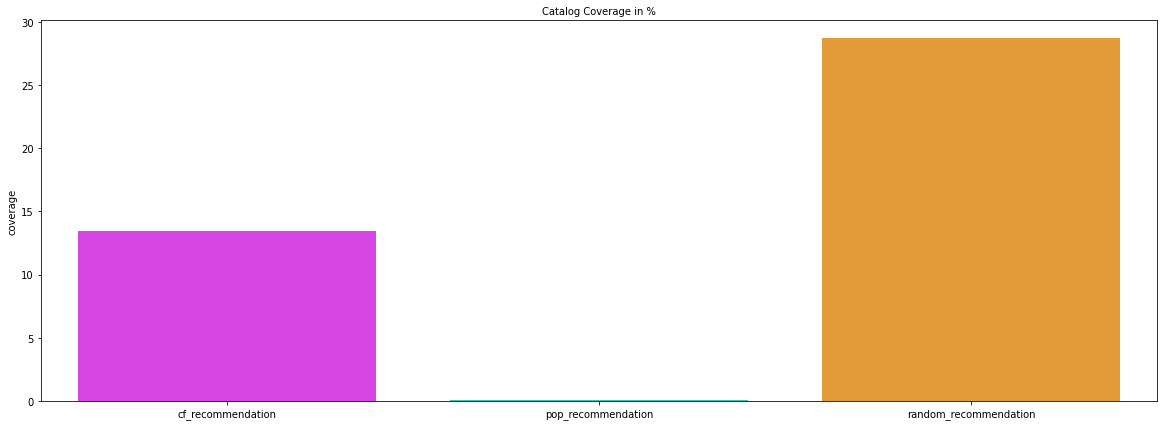

In [1046]:
coverage_scores = [cf_coverage, pop_coverage, random_coverage ]
model_names = ["cf_recommendation","pop_recommendation", "random_recommendation"]

fig = plt.figure(figsize=(20, 7))
recommender_palette = ["#ED2BFF", "#14E2C0", "#FF9F1C"]
sns.set_palette(recommender_palette)
ax = sns.barplot(x=model_names, y=coverage_scores)
ax.set_title('Catalog Coverage in %', fontsize=10)
ax.set_ylabel('coverage')
plt.savefig('Catalog coverage.png')
plt.show()

CHEKING!!!!

#### Adding other models to comparison:

In [ ]:
#all models top10 results(movieId) in list
model_based_collaborative_recommedations= recommend['movieId'].tolist() 
memory_based_user_item_recommedations = top_s10['movieId'].tolist() 
memory_based_item_item_recommedations = best10['movieId'].tolist() 
content_based_recommendations = content_based_rec_list.tolist()

In [956]:

mbc_rec= []
for user in test.index:
    mbc_predictions = model_based_collaborative_recommedations
    mbc_rec.append(mbc_predictions)
        
test['model_based_collaborative_recommedations'] = mbc_rec
test.head()

actual  \
userId                                                      
1       [256, 8961, 4993, 33794, 1923, 261, 48780, 780...   
2                         [36, 5, 1356, 14, 784, 376, 95]   
3       [800, 608, 34, 515, 165, 5, 296, 11, 588, 527,...   
4       [1281, 2690, 2692, 1412, 2948, 2951, 1284, 282...   
5       [1, 7046, 32017, 3616, 78637, 175, 1206, 81847...   

                                           cf_predictions  \
userId                                                      
1       [5952, 912, 7153, 4993, 1089, 33794, 589, 150,...   
2       [36, 14, 1356, 376, 5, 95, 784, 26159, 25940, ...   
3        [527, 608, 296, 800, 529, 515, 11, 509, 34, 588]   
4       [608, 1252, 1219, 2019, 1230, 912, 296, 910, 1...   
5       [2762, 110, 1, 364, 1206, 2300, 2871, 1012, 59...   

                                          pop_predictions  \
userId                                                      
1       [296, 356, 318, 480, 593, 260, 2571, 589, 527,...   
2       [296, 356, 318, 480, 593, 260, 2571, 589, 527,...   
3       [296, 356, 318, 480, 593, 260, 2571, 589, 527,...   
4       [296, 356, 318, 480, 593, 260, 2571, 589, 527,...   
5       [296, 356, 318, 480, 593, 260, 2571, 589, 527,...   

                 model_based_collaborative_recommedations  
userId                                                     
1       [296, 356, 318, 480, 593, 260, 2571, 589, 527,...  
2       [296, 356, 318, 480, 593, 260, 2571, 589, 527,...  
3       [296, 356, 318, 480, 593, 260, 2571, 589, 527,...  
4       [296, 356, 318, 480, 593, 260, 2571, 589, 527,...  
5       [296, 356, 318, 480, 593, 260, 2571, 589, 527,...

In [840]:
mbii_recs = []
for user in test.index:
    mbii_predictions = memory_based_item_item_recommedations
    mbii_recs.append(mbii_predictions)
        
test['memory_based_item_item_recommedations'] = mbii_recs
test.head()

userId  movieId  actual  prediction                    details  \
0     164     2701     3.0    2.861058  {'was_impossible': False}   
1     139     4886     4.0    3.799333  {'was_impossible': False}   
2       1     1267     4.0    3.632787  {'was_impossible': False}   
3     224    68237     5.0    3.837416  {'was_impossible': False}   
4     403    59615     2.5    2.901408  {'was_impossible': False}   

                                     pop_predictions  \
0  [296, 356, 318, 480, 593, 260, 2571, 589, 527,...   
1  [296, 356, 318, 480, 593, 260, 2571, 589, 527,...   
2  [296, 356, 318, 480, 593, 260, 2571, 589, 527,...   
3  [296, 356, 318, 480, 593, 260, 2571, 589, 527,...   
4  [296, 356, 318, 480, 593, 260, 2571, 589, 527,...   

         model_based_collaborative_recommedations  \
0  [260, 1, 780, 648, 608, 736, 62, 1073, 32, 36]   
1  [260, 1, 780, 648, 608, 736, 62, 1073, 32, 36]   
2  [260, 1, 780, 648, 608, 736, 62, 1073, 32, 36]   
3  [260, 1, 780, 648, 608, 736, 62, 1073, 32, 36]   
4  [260, 1, 780, 648, 608, 736, 62, 1073, 32, 36]   

        memory_based_item_item_recommedations  
0  [10, 318, 318, 318, 10, 145, 10, 780, 318]  
1  [10, 318, 318, 318, 10, 145, 10, 780, 318]  
2  [10, 318, 318, 318, 10, 145, 10, 780, 318]  
3  [10, 318, 318, 318, 10, 145, 10, 780, 318]  
4  [10, 318, 318, 318, 10, 145, 10, 780, 318]

In [841]:
mbui_recs = []
for user in test.index:
    mbui_predictions = memory_based_user_item_recommedations
    mbui_recs.append(mbui_predictions)
        
test['memory_based_user_item_recommedations'] = mbui_recs
test.head()

userId  movieId  actual  prediction                    details  \
0     164     2701     3.0    2.861058  {'was_impossible': False}   
1     139     4886     4.0    3.799333  {'was_impossible': False}   
2       1     1267     4.0    3.632787  {'was_impossible': False}   
3     224    68237     5.0    3.837416  {'was_impossible': False}   
4     403    59615     2.5    2.901408  {'was_impossible': False}   

                                     pop_predictions  \
0  [296, 356, 318, 480, 593, 260, 2571, 589, 527,...   
1  [296, 356, 318, 480, 593, 260, 2571, 589, 527,...   
2  [296, 356, 318, 480, 593, 260, 2571, 589, 527,...   
3  [296, 356, 318, 480, 593, 260, 2571, 589, 527,...   
4  [296, 356, 318, 480, 593, 260, 2571, 589, 527,...   

         model_based_collaborative_recommedations  \
0  [260, 1, 780, 648, 608, 736, 62, 1073, 32, 36]   
1  [260, 1, 780, 648, 608, 736, 62, 1073, 32, 36]   
2  [260, 1, 780, 648, 608, 736, 62, 1073, 32, 36]   
3  [260, 1, 780, 648, 608, 736, 62, 1073, 32, 36]   
4  [260, 1, 780, 648, 608, 736, 62, 1073, 32, 36]   

        memory_based_item_item_recommedations  \
0  [10, 318, 318, 318, 10, 145, 10, 780, 318]   
1  [10, 318, 318, 318, 10, 145, 10, 780, 318]   
2  [10, 318, 318, 318, 10, 145, 10, 780, 318]   
3  [10, 318, 318, 318, 10, 145, 10, 780, 318]   
4  [10, 318, 318, 318, 10, 145, 10, 780, 318]   

               memory_based_user_item_recommedations  
0  [924, 1291, 2858, 3996, 4027, 5120, 5135, 5225...  
1  [924, 1291, 2858, 3996, 4027, 5120, 5135, 5225...  
2  [924, 1291, 2858, 3996, 4027, 5120, 5135, 5225...  
3  [924, 1291, 2858, 3996, 4027, 5120, 5135, 5225...  
4  [924, 1291, 2858, 3996, 4027, 5120, 5135, 5225...

In [842]:
content_recs = []
for user in test.index:
    content_predictions = content_based_recommendations
    content_recs.append(content_predictions)
        
test['content_based_recommendations'] = content_recs
test.head()

userId  movieId  actual  prediction                    details  \
0     164     2701     3.0    2.861058  {'was_impossible': False}   
1     139     4886     4.0    3.799333  {'was_impossible': False}   
2       1     1267     4.0    3.632787  {'was_impossible': False}   
3     224    68237     5.0    3.837416  {'was_impossible': False}   
4     403    59615     2.5    2.901408  {'was_impossible': False}   

                                     pop_predictions  \
0  [296, 356, 318, 480, 593, 260, 2571, 589, 527,...   
1  [296, 356, 318, 480, 593, 260, 2571, 589, 527,...   
2  [296, 356, 318, 480, 593, 260, 2571, 589, 527,...   
3  [296, 356, 318, 480, 593, 260, 2571, 589, 527,...   
4  [296, 356, 318, 480, 593, 260, 2571, 589, 527,...   

         model_based_collaborative_recommedations  \
0  [260, 1, 780, 648, 608, 736, 62, 1073, 32, 36]   
1  [260, 1, 780, 648, 608, 736, 62, 1073, 32, 36]   
2  [260, 1, 780, 648, 608, 736, 62, 1073, 32, 36]   
3  [260, 1, 780, 648, 608, 736, 62, 1073, 32, 36]   
4  [260, 1, 780, 648, 608, 736, 62, 1073, 32, 36]   

        memory_based_item_item_recommedations  \
0  [10, 318, 318, 318, 10, 145, 10, 780, 318]   
1  [10, 318, 318, 318, 10, 145, 10, 780, 318]   
2  [10, 318, 318, 318, 10, 145, 10, 780, 318]   
3  [10, 318, 318, 318, 10, 145, 10, 780, 318]   
4  [10, 318, 318, 318, 10, 145, 10, 780, 318]   

               memory_based_user_item_recommedations  \
0  [924, 1291, 2858, 3996, 4027, 5120, 5135, 5225...   
1  [924, 1291, 2858, 3996, 4027, 5120, 5135, 5225...   
2  [924, 1291, 2858, 3996, 4027, 5120, 5135, 5225...   
3  [924, 1291, 2858, 3996, 4027, 5120, 5135, 5225...   
4  [924, 1291, 2858, 3996, 4027, 5120, 5135, 5225...   

                       content_based_recommendations  
0  [325, 311, 308, 294, 290, 273, 261, 253, 248, ...  
1  [325, 311, 308, 294, 290, 273, 261, 253, 248, ...  
2  [325, 311, 308, 294, 290, 273, 261, 253, 248, ...  
3  [325, 311, 308, 294, 290, 273, 261, 253, 248, ...  
4  [325, 311, 308, 294, 290, 273, 261, 253, 248, ...

#### Coverage-Scores

In [865]:
import random
#Computes the prediction coverage for a list of recommendations
def prediction_coverage(predicted, catalog) -> float:
    predicted_flattened = [p for sublist in predicted for p in sublist]
    unique_predictions = len(set(predicted_flattened))
    prediction_coverage = round(unique_predictions/(len(catalog)* 1.0)*100,2)
    return prediction_coverage


In [872]:
# Computes the catalog coverage for lists of recommendations
def catalog_coverage(predicted, catalog, k: int) -> float:
    sampling = random.choices(predicted, k=k)
    predicted_flattened = [p for sublist in sampling for p in sublist]
    L_predictions = len(set(predicted_flattened))
    catalog_coverage = round(L_predictions/(len(catalog)*1.0),4)
    return catalog_coverage

In [873]:
#values in test dataframe columns
actual = test.actual.values.tolist()
mbc_predictions = test.model_based_collaborative_recommedations.values.tolist()
mbii_predictions = test.memory_based_item_item_recommedations.values.tolist()
mbui_predictions = test.memory_based_user_item_recommedations.values.tolist()
content_predictions = test.content_based_recommendations.values.tolist()
pop_predictions = test.pop_predictions.values.tolist()

In [874]:
#A list of all unique items in the training data
catalog = ratings_df.movieId.unique().tolist()

In [875]:
#Computes the prediction coverage for a list of recommendations
mbui_coverage = prediction_coverage(mbui_recs, catalog)*100
mbii_coverage = prediction_coverage(mbii_recs, catalog)*100
mbc_coverage = prediction_coverage(mbc_rec, catalog)*100
content_coverage = prediction_coverage(content_recs, catalog)*100
pop_coverage = prediction_coverage(pop_recs, catalog)*100

In [876]:
# Computes the catalog coverage for lists of recommendations
mbui_cat_coverage = catalog_coverage(mbui_recs, catalog, 100)
mbii_cat_coverage = catalog_coverage(mbii_recs, catalog, 100)
mbc_cat_coverage = catalog_coverage(mbc_rec, catalog, 100)
content_cat_coverage = catalog_coverage(content_recs, catalog, 100)
pop_cat_coverage = catalog_coverage(pop_recs, catalog, 100)

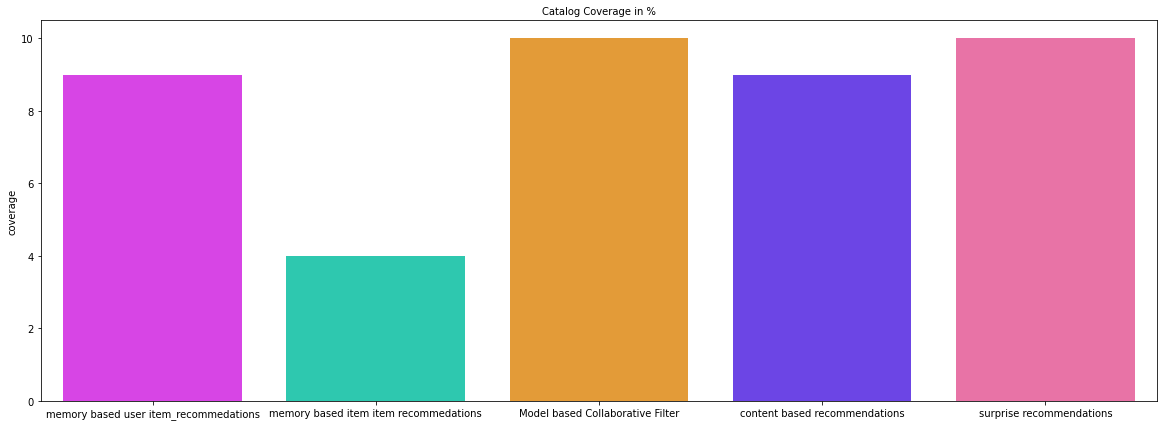

In [899]:
coverage_scores = [mbui_coverage, mbii_coverage, mbc_coverage,content_coverage, pop_coverage ]
model_names = ['memory based user item_recommedations', 'memory based item item recommedations', 'Model based Collaborative Filter', 'content based recommendations', 'surprise recommendations']

fig = plt.figure(figsize=(20, 7))
recommender_palette = ["#ED2BFF", "#14E2C0", "#FF9F1C", "#5E2BFF","#FC5FA3"]
sns.set_palette(recommender_palette)
ax = sns.barplot(x=model_names, y=coverage_scores)
ax.set_title('Catalog Coverage in %', fontsize=10)
ax.set_ylabel('coverage')
plt.savefig('Catalog coverage.png')
plt.show()